# Assignment1: K Means Clustering using Binary Split

In [162]:
#Libraries required for my code to run

#Uncomment this if you want to display your [graphs] within the notebook in a proper format.
%matplotlib inline
#Uncomment this if you want to display your graphs in backend


import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from pandas import DataFrame
import pandas as pd
import numpy as np
from numpy.random import randn
import glob
import sys

import warnings
warnings.filterwarnings('ignore')


1.Synthetic Data Generation first method

[-3.56634290e-03  3.94727848e+00]


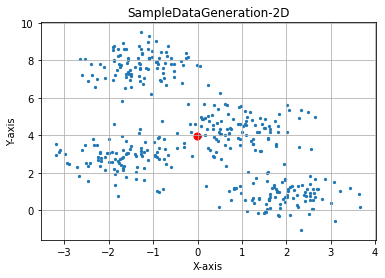

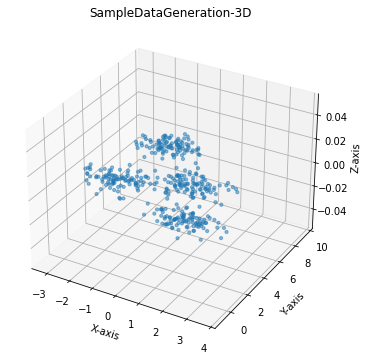

Text(0.5, 1.0, 'Histogram')

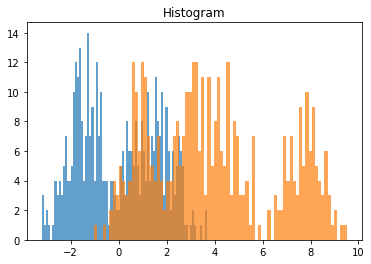

In [59]:
#Synthetic Data Generation first method

K=4 # Step1:Choose the Number of clusters
#%matplotlib
from sklearn.datasets.samples_generator import make_blobs
Data, y_true = make_blobs(n_samples=400, centers=K,
                       cluster_std=0.70, random_state=0)

df = pd.DataFrame(data=Data, columns=["X", "Y"])
#Plot 2D

plt.scatter(Data[:, 0], Data[:, 1], s=5)

    
centers = df.mean(0)
Initial_Centroid=centers.to_numpy()
print(Initial_Centroid)

plt.scatter(centers['X'],centers['Y'],c='red', s=50)
plt.title("SampleDataGeneration-2D")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
#plt.scatter(centers[:, 0], centers[:, 1],c='red', s=50)
#plt.title("SampleDataGeneration-2D")
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.grid()

#3D Plot
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Data[:, 0],Data[:, 1],
           linewidths=1, alpha=0.5,
           #edgecolor='k',
           s =10,
           )
ax.set_title("SampleDataGeneration-3D")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()


def plot_hist(data):
    for x in data:
        plt.hist(x, bins = 80, alpha = 0.7)

plot_hist([Data[:, 0], Data[:, 1]])
plt.title("Histogram")

In [154]:
def EuclideanDistance(Dataset,Centroids):
    labels = []
    for i in range(len(Centroids)):
        labels.append(np.sqrt((np.sum((Dataset - Centroids[i])*(Dataset - Centroids[i]),axis=1))))
    labels = np.array(labels).T
    return np.argmin(labels,axis=1)

In [157]:
def EuclideanDistance1(Dataset,Centroids):
    from sklearn.metrics import pairwise_distances_argmin
    labels=pairwise_distances_argmin(Dataset,Centroids)
    return labels.T

In [161]:
EuclideanDistance(Data, Initial_Centroid)

array([2, 0, 3, 3, 1, 2, 2, 0, 3, 3, 1, 1, 3, 0, 1, 3, 2, 2, 1, 1, 0, 3,
       0, 1, 1, 1, 2, 2, 1, 3, 0, 2, 1, 2, 2, 1, 1, 3, 3, 2, 2, 0, 0, 3,
       1, 2, 0, 0, 3, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 0,
       0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 3, 0, 0, 1, 3, 2, 0, 2, 1,
       2, 3, 1, 1, 0, 0, 1, 1, 2, 3, 2, 1, 3, 1, 3, 1, 1, 3, 0, 0, 3, 1,
       1, 2, 0, 1, 3, 1, 2, 1, 0, 3, 0, 1, 0, 1, 3, 1, 3, 3, 0, 0, 0, 3,
       0, 2, 2, 3, 0, 2, 1, 3, 3, 0, 1, 0, 1, 1, 0, 1, 3, 2, 2, 0, 0, 1,
       1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 3, 2, 2, 0, 2, 2, 0, 0, 0, 3, 3, 2,
       0, 2, 1, 0, 0, 3, 0, 1, 2, 3, 1, 1, 2, 1, 0, 3, 0, 0, 1, 1, 3, 2,
       2, 1, 3, 3, 2, 0, 1, 3, 1, 1, 0, 3, 1, 3, 3, 0, 3, 2, 0, 0, 1, 1,
       1, 1, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2, 3, 3, 3, 1, 0, 3, 3, 0, 2, 2,
       3, 3, 2, 1, 2, 0, 1, 2, 1, 0, 1, 2, 3, 3, 3, 2, 0, 3, 2, 0, 2, 0,
       2, 0, 1, 0, 2, 3, 3, 3, 0, 1, 3, 1, 0, 2, 0, 3, 0, 2, 1, 2, 0, 3,
       0, 3, 0, 3, 3, 1, 2, 0, 2, 2, 3, 3, 2, 0], d

In [124]:
Initial_Centroid

array([[70.63218391, 76.        ],
       [75.95890411, 22.69863014],
       [20.33333333, 76.31884058],
       [24.14084507, 27.6056338 ]])

In [159]:
EuclideanDistance1(Data, Initial_Centroid)

array([2, 0, 3, 3, 1, 2, 2, 0, 3, 3, 1, 1, 3, 0, 1, 3, 2, 2, 1, 1, 0, 3,
       0, 1, 1, 1, 2, 2, 1, 3, 0, 2, 1, 2, 2, 1, 1, 3, 3, 2, 2, 0, 0, 3,
       1, 2, 0, 0, 3, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 0,
       0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 3, 0, 0, 1, 3, 2, 0, 2, 1,
       2, 3, 1, 1, 0, 0, 1, 1, 2, 3, 2, 1, 3, 1, 3, 1, 1, 3, 0, 0, 3, 1,
       1, 2, 0, 1, 3, 1, 2, 1, 0, 3, 0, 1, 0, 1, 3, 1, 3, 3, 0, 0, 0, 3,
       0, 2, 2, 3, 0, 2, 1, 3, 3, 0, 1, 0, 1, 1, 0, 1, 3, 2, 2, 0, 0, 1,
       1, 2, 1, 2, 0, 0, 1, 0, 2, 2, 3, 2, 2, 0, 2, 2, 0, 0, 0, 3, 3, 2,
       0, 2, 1, 0, 0, 3, 0, 1, 2, 3, 1, 1, 2, 1, 0, 3, 0, 0, 1, 1, 3, 2,
       2, 1, 3, 3, 2, 0, 1, 3, 1, 1, 0, 3, 1, 3, 3, 0, 3, 2, 0, 0, 1, 1,
       1, 1, 0, 0, 3, 0, 1, 1, 0, 1, 0, 2, 3, 3, 3, 1, 0, 3, 3, 0, 2, 2,
       3, 3, 2, 1, 2, 0, 1, 2, 1, 0, 1, 2, 3, 3, 3, 2, 0, 3, 2, 0, 2, 0,
       2, 0, 1, 0, 2, 3, 3, 3, 0, 1, 3, 1, 0, 2, 0, 3, 0, 2, 1, 2, 0, 3,
       0, 3, 0, 3, 3, 1, 2, 0, 2, 2, 3, 3, 2, 0], d

In [163]:
# Step2. Randomly choose initial Centroids

def Kmeans(X, clusters):
    
    Initial_Centroids=InitialCents
    print("Initial Centroids: ",Initial_Centroids,'\n')
    clusters=len(Initial_Centroids)
    #print("Initial Centroids are:\n",Initial_Centroids)
    #I am capturing dataset in excel.Making sure if that already exists.If exists,overwrite
    #If not,create new

    #fileList = glob.glob('C:\dataset*.xlsx')
    j=0
    while True:       
        print("K-Means Iteration: ",j,'\n')
        # Step2a: Assign labels to datapoints or assign datapoints
        #to cluster based on minimum distance to the closest-centeroid
        
        labels = EuclideanDistance(X,Initial_Centroids)
        #print(labels)
        
        
        df = pd.DataFrame(data=X, columns=["X", "Y"])
        
        df['Cluster']=labels
        #Capturing my data in excel.Whoevere uses this give the path name as per your sytem settings
        #Validation part.uncomment below line.
        #df.to_excel (r'C:\dataset'+str(j)+'.xlsx', index = True, header=True)
       
        # Step3: Find new centeroids by calculating
        # Means of Datapoints belonging to the same cluster 
        
        New_Centroids = np.array([X[labels == i].mean(0)
                                for i in range(clusters)])
        print("New_Centroids: \n",New_Centroids,'\n')
        #df1 = pd.DataFrame(data=New_Centroids, columns=["X", "Y"])
        
         #Capturing my centroids in excel.Whoevere uses this give the path name as per your sytem settings
        #Validation part.uncomment below line.
        #df1.to_excel (r'C:\Centroids'+str(j)+'.xlsx', index = True, header=True)
        
        # Step4: Check if previous-centroids and new-centroids are equal
        #print(centers)
        #print(new_centers)
 
        if np.all((Initial_Centroids == New_Centroids)):
            break
        j=j+1    
        Initial_Centroids = New_Centroids
       
    
    return New_Centroids, labels


#print(centers)
#print(labels)


Method2: Synthetic Data Generation

centers X    49.356667
Y    51.650000
dtype: float64
[49.35666667 51.65      ]


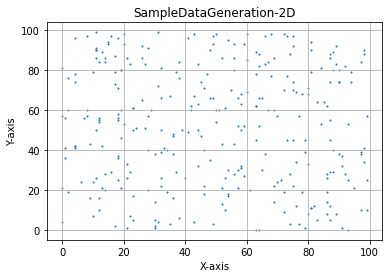

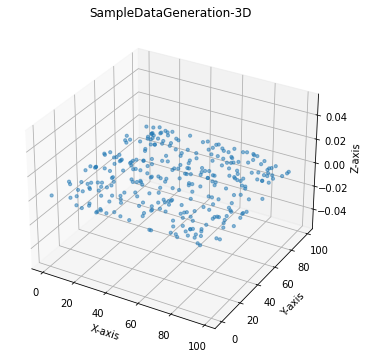

Text(0.5, 1.0, 'Histogram')

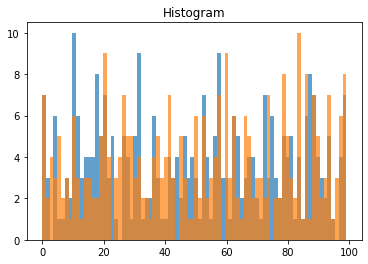

In [66]:
K=4 #Choose Clusters
#2 features/columns

x = np.random.randint(100,size=(300,1))
y = np.random.randint(100,size=(300,1))
#z=np.random.randint(100,size=(10,1))

Df = {'X': x[:,0],
        'Y': y[:,0],
        #'Z': z[:,0]
       
       }
Df = DataFrame(Df,columns=['X','Y'])

Data=Df.to_numpy()

#Plot 2D

plt.scatter(Data[:,0], Data[:,1],s=1)
#Plot/Show Initial Centroids 
#centers1 = Df.sample(1)

centers=Df.mean(0)
print("centers",centers)

Initial_Centroid=centers.to_numpy()
print(Initial_Centroid)



#plt.scatter(centers['X'], centers['Y'],c='red', s=50)
plt.title("SampleDataGeneration-2D")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()


#Plot 3D
#%matplotlib notebook
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(Data[:,0],Data[:,1],
           linewidths=1,
           alpha=0.5,
           s =10,
           )
ax.set_title("SampleDataGeneration-3D")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()


def plot_hist(data):
    for x in data:
        plt.hist(x, bins = 80, alpha = 0.7)

plot_hist([Data[:, 0], Data[:, 1]])
plt.title("Histogram")

# Binary Split Initialization

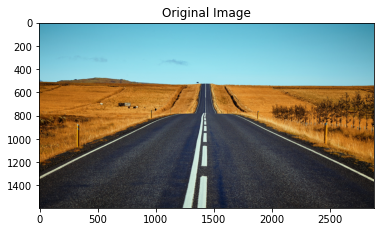

In [165]:
img = np.array(Image.open('road.jpg'))
plt.imshow(img)
plt.title('Original Image')
plt.show()
Data=img.reshape((-1,3));

Dividing clusters using BinarySplit 

IterationBinarySplit:  0 

Intial Centroids:  [[70.63218391 76.        ]
 [75.95890411 22.69863014]
 [20.33333333 76.31884058]
 [24.14084507 27.6056338 ]] 

BinarySplit New 8 Centroids [[70.63418391 76.002     ]
 [75.96090411 22.70063014]
 [20.33533333 76.32084058]
 [24.14284507 27.6076338 ]
 [70.63018391 75.998     ]
 [75.95690411 22.69663014]
 [20.33133333 76.31684058]
 [24.13884507 27.6036338 ]] 



Since the size of centroids after binary split is twice the number of clusters 


Hence,exit the code as i met with my convergence criteria!!


My final Converged centroids are:  [[70.63218391 76.        ]
 [75.95890411 22.69863014]
 [20.33333333 76.31884058]
 [24.14084507 27.6056338 ]] 



ValueError: 'c' argument has 300 elements, which is inconsistent with 'x' and 'y' with size 4587840.

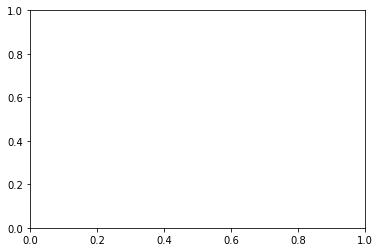

In [166]:
count=0
while True:
    
    print("Dividing clusters using BinarySplit \n")
    print("IterationBinarySplit: ",count,'\n')
   
    c=[]
    #size=Initial_Centroid.ndim
    print("Intial Centroids: ", Initial_Centroid,'\n')
    
    for i in range(1):
        InitialCentroid1=Initial_Centroid+0.002
        cent=c.append(InitialCentroid1)
        InitialCentroid2=Initial_Centroid-0.002
        cent=c.append(InitialCentroid2)
    InitialCents=np.vstack(c)  
     
    print(f"BinarySplit New {len(InitialCents)} Centroids", InitialCents,'\n')
    sie=len(InitialCents)
    

    
    if(sie==2*K):
        print("\n\nSince the size of centroids after binary split is twice the number of clusters",'\n')
        print("\nHence,exit the code as i met with my convergence criteria!!")
        break
    
    
    #print(sie)
    #condtn=2*K
    #print(condtn)
    print("\nEntering into Kmeans algorithm",'\n')
    Codebook,labels = Kmeans(Data,K)
        #print(Codebook)
    Initial_Centroid=Codebook
        #print(Initial_Centroid)
    centcount=len(Codebook)
    #print(centcount)
    
    #Plot 2D
    plt.scatter(Data[:, 0], Data[:, 1],s=10,c=labels,cmap='viridis');
    plt.scatter(Codebook[:, 0], Codebook[:, 1], c='Black', s=50, alpha=0.7);
    plt.title(f"CodebookResult-2D after Binary Spilit")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.grid()
    plt.show()
    
   
    
    if(sie!=(2*K)):
        
    
        Codebook=Initial_Centroid
        count=count+1 
        #print(count)
        continue
       
        
    else:
        break
        
print("\n\nMy final Converged centroids are: ",Codebook,'\n')     
       

#Plot 2D
plt.scatter(Data[:, 0], Data[:, 1],s=10,c=labels,cmap='viridis');
plt.scatter(Codebook[:, 0], Codebook[:, 1], c='Black', s=50, alpha=0.7);
plt.title("CodebookResult-2D")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()



fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(Data[:, 0], Data[:, 1], c=labels,linewidths=1,
            s=2, cmap='viridis',alpha=0.5)
ax.scatter(Codebook[:, 0], Codebook[:, 1], c='Black', s=60, alpha=0.5);
ax.set_title("CodebookResult-3D")
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()
#print(Codebook)

In [7]:
j=0
X=[]

for i in range(K):
    Data1= np.array(Data[labels == i])
    X.append(Data1)
    print("Data"+str(j),Data1)
    j=j+1
X=np.vstack(X)    
#print("KMeans:",X)
#print(X.shape[1])

Data0 [[82 64]
 [51 81]
 [70 79]
 [88 87]
 [62 61]
 [58 75]
 [94 76]
 [99 54]
 [53 52]
 [97 90]
 [93 85]
 [96 94]
 [98 61]
 [88 61]
 [86 54]
 [78 80]
 [56 71]
 [58 60]
 [50 76]
 [82 88]
 [93 89]
 [70 77]
 [91 77]
 [53 91]
 [86 64]
 [93 80]
 [73 97]
 [99 97]
 [99 94]
 [49 87]
 [62 94]
 [49 96]
 [83 56]
 [51 63]
 [90 83]
 [81 68]
 [56 86]
 [90 85]
 [51 63]
 [61 84]
 [53 79]
 [60 71]
 [94 55]
 [86 98]
 [80 95]
 [57 88]
 [85 65]
 [71 74]
 [55 84]
 [65 76]
 [78 95]
 [97 81]
 [65 73]
 [65 91]
 [89 80]
 [54 95]
 [72 74]
 [57 73]
 [96 55]
 [86 87]
 [63 66]
 [77 90]
 [79 77]
 [61 74]
 [57 77]
 [73 76]
 [62 70]
 [51 65]
 [78 79]
 [84 58]
 [76 78]
 [68 77]
 [53 71]
 [79 98]
 [65 84]
 [77 77]
 [88 63]
 [54 94]
 [96 63]
 [67 91]
 [72 60]
 [87 96]
 [89 71]
 [66 52]
 [80 57]
 [89 89]
 [81 56]
 [95 94]
 [78 62]]
Data1 [[84 44]
 [74 24]
 [67 12]
 [62  2]
 [56 22]
 [96  3]
 [88 10]
 [98  6]
 [71 14]
 [56 15]
 [55 39]
 [67 26]
 [59  4]
 [72 32]
 [89 27]
 [98 25]
 [60 48]
 [89 24]
 [96 28]
 [54  7]
 [94 4

In [8]:
Clusterss = np.zeros((len(Data),K));Clusterss.shape

(300, 4)

In [9]:
len(Data)

300

[[74.48314607 76.78651685]
 [76.56140351 25.50877193]
 [21.33333333 75.5942029 ]
 [29.65882353 23.11764706]]


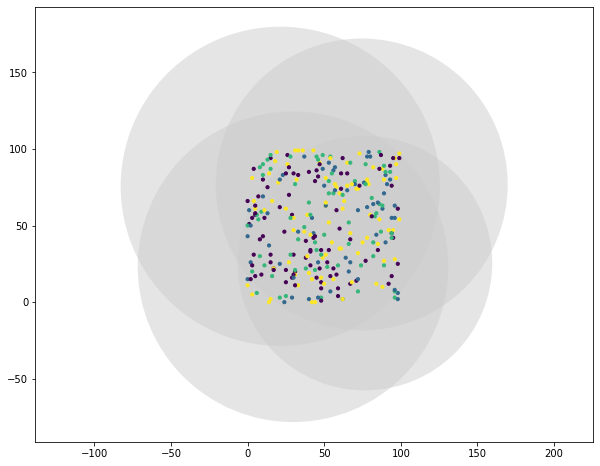

In [10]:
plt.figure(figsize = (10,8))
from scipy.spatial.distance import cdist

def Kmeans_circularpatch(label, X, n_clusters=K, ax=None):
    #label = labels

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model with patch in transparent color
    centers = Codebook
    print(Codebook)
    radii = [cdist(X[label == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        
Kmeans_circularpatch(labels, X)

-------------------------------------------------------------------------------------------------
Generate data separately for GMM using below two cells 

In [167]:
def generate_data(n_data, means, covariances, weights):
    """creates a list of data points"""
    n_clusters, n_features = means.shape
    
    data = np.zeros((n_data, n_features))
    for i in range(n_data):
        # pick a cluster id and create data from this cluster
        k = np.random.choice(n_clusters, size = 1, p = weights)[0]
        x = np.random.multivariate_normal(means[k], covariances[k])
        data[i] = x
   
    return data

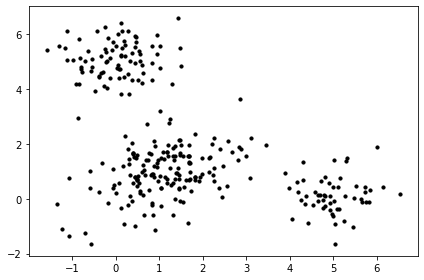

Text(0.5, 1.0, 'Histogram')

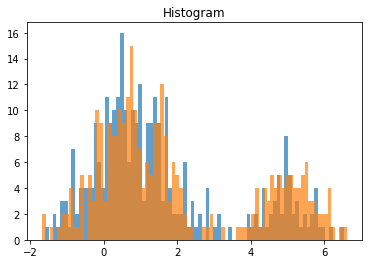

In [12]:
# Model parameters, including the mean
# covariance matrix and the weights for each cluster
init_means = np.array([
    [5, 0],
    [1, 1],
    [0, 5]
])

init_covariances = np.array([
    [[.5, 0.], [0, .5]],
    [[.92, .38], [.38, .91]],
    [[.5, 0.], [0, .5]]
])

init_weights = [1 / 4, 1 / 2, 1 / 4]

# generate data
np.random.seed(4)
X = generate_data(300, init_means, init_covariances, init_weights)
Df = {'X': X[:,0],
        'Y': X[:,1],
        #'Z': z[:,0]
       
       }
Df = DataFrame(Df,columns=['X','Y'])

Data=Df.to_numpy()


centers=Df.mean(0)
#print("centers",centers)

Initial_Centroid=centers.to_numpy()
#print(Initial_Centroid)

plt.scatter(X[:, 0], X[:, 1], c='k',s=10)
plt.tight_layout()
plt.show()

def plot_hist(data):
    for x in data:
        plt.hist(x, bins = 80, alpha = 0.7)

plot_hist([X[:, 0], X[:, 1]])
plt.title("Histogram")

Otherwise use the Kmeans result for GMM to initialize the parameters.

In [13]:
#Here i am calculating the parameters of Kmeans clusters required for GMM
def calculate_mean_covariance_weight(X, prediction):
    C = K
    d = X.shape[1]
    
    gaussians= np.unique(prediction)
    
    initial_means = np.zeros((C, d))
    initial_cov = np.zeros((C, d, d))
    initial_pi = np.zeros(C)
        
    counter=0
    for label in sorted(gaussians):
        ids = np.where(prediction == label) # returns indices
        print("Ids of class/label"+str(counter),ids)
        initial_pi[counter] = len(ids[0]) / X.shape[0] 
        print(initial_pi[counter])
        initial_means[counter,:] = np.mean(X[ids], axis = 0)
        de_meaned = X[ids] - initial_means[counter,:]
        Nk = X[ids].shape[0]
        print(Nk,X.shape[0])
        initial_cov[counter,:, :] = np.dot(initial_pi[counter] * de_meaned.T, de_meaned) / Nk
        counter+=1
       
    assert np.sum(initial_pi) == 1
    return (initial_means, initial_cov, initial_pi)
    

prediction = labels

m, c, pi = calculate_mean_covariance_weight(X, prediction)
print("Initial mean:",m)
print("Initial Covariance matrix",c)
print("Initial pi/weight counter:",pi)

Ids of class/label0 (array([  6,  12,  17,  20,  28,  30,  39,  59,  63,  65,  74,  81,  86,
        87,  91,  93,  97, 101, 104, 105, 109, 111, 120, 124, 125, 126,
       134, 137, 138, 140, 141, 146, 149, 152, 153, 156, 157, 158, 159,
       163, 168, 169, 171, 174, 176, 177, 180, 181, 184, 186, 197, 207,
       209, 212, 213, 214, 216, 218, 223, 224, 226, 228, 229, 230, 232,
       233, 238, 245, 250, 255, 257, 261, 267, 268, 271, 272, 275, 279,
       282, 283, 285, 286, 290, 291, 292, 293, 297, 298, 299], dtype=int64),)
0.2966666666666667
89 300
Ids of class/label1 (array([  0,  13,  18,  21,  22,  23,  25,  29,  34,  36,  38,  42,  44,
        45,  46,  50,  52,  57,  58,  70,  73,  78,  80,  82,  88,  89,
        92,  96, 100, 108, 110, 118, 123, 130, 131, 144, 151, 155, 160,
       162, 205, 206, 210, 211, 219, 221, 235, 240, 241, 243, 247, 249,
       258, 265, 270, 287, 295], dtype=int64),)
0.19
57 300
Ids of class/label2 (array([  2,  10,  16,  24,  31,  32,  35,  37,  40,  

In [14]:
from scipy.stats import multivariate_normal
X=Data
class GaussianMixture:
    #Here you will create a refernce to all the parameters which gets substituted against declared variables
    def __init__(this, gaussians: int, n_iters: int, tol: float, seed: int):
        this.gaussians = gaussians
        this.n_iters = n_iters
        this.tol = tol
        this.seed = seed

    def fit(this, X):

        # data's dimensionality and probability vector initialization
        n_row, n_col = X.shape     
        this.probability = np.zeros((n_row, this.gaussians))
        
        print(this.probability)
        
        ##Below multicommented block can be used if you want to apply GMM on a dataset without Kmeans result
        
        """
        # initialize parameters
        np.random.seed(this.seed)
        chosen = np.random.choice(n_row, this.gaussians, replace = False)
        print("Chosen:",chosen)
        this.means = X[chosen]
        print("Initial Means:",this.means)
        this.weights = np.full(this.gaussians, 1 / this.gaussians)
        print("Initial weights:",this.weights)
        
        # for np.cov, rowvar = False, 
        # indicates that the rows represents obervation
        shape = this.gaussians, n_col, n_col
        this.covs = np.full(shape, np.cov(X, rowvar = False))
        print("Initial Covariance:",this.covs)
        """
        this.means=m
        this.weights=pi
        this.covs=c

        log_likelihood = 0 #Initializing for iteration
        this.converged = False
        this.log_likelihood_trace = []      

        for i in range(this.n_iters):
            print("Iteration:",i)
            log_likelihood_new = this.Estep(X,i)
            this.Mstep(X)
            
            if abs(log_likelihood_new - log_likelihood) == this.tol:
                
                this.converged = True
                break
  
            log_likelihood = log_likelihood_new
            this.log_likelihood_trace.append(log_likelihood)
        print("log_likelihood_trace:",this.log_likelihood_trace)

        return i

    def Estep(this, X,i):
        """
        E-step: compute probability,
        update probability matrix so that probability[i, j] is the probability of cluster k 
        for data point i,
        to compute likelihood of data point i belonging to given cluster k, 
        use multivariate_normal.pdf
        """
        this._compute_log_likelihood(X,i)
        log_likelihood = np.sum(np.log(np.sum(this.probability, axis = 1)))

         #Normalization       
        this.probability = this.probability / this.probability.sum(axis = 1, keepdims = 1)
        print("Normalised probability",this.probability)
        return log_likelihood

    def _compute_log_likelihood(this, X,i):
        for k in range(this.gaussians):
            if i == 0:
                
                prior = this.weights[k]
                print("prior_weight",prior)
                likelihood = multivariate_normal(this.means[k], this.covs[k]).pdf(X)
                print("Likelihood/probability"+str(k),likelihood)
                this.probability[:, k] = prior * likelihood
                print(" Size of Initial Probability of all the datapoints in cluster"+str(k),this.probability.shape)
            if i > 0: 
                updated_weight = this.weights[k]
                print("Updated_weight",updated_weight)
                likelihood = multivariate_normal(this.means[k], this.covs[k]).pdf(X)
                print("New_Likelihood"+str(k),likelihood.shape)
                this.probability[:, k] = updated_weight * likelihood
                print("Posterior Probability:"+str(k),this.probability.shape)

        return this

    def Mstep(this, X):
        """M-step, update parameters"""

        # total probability assigned to each cluster, Soft alocation(N^soft)
        #print("probability assigned to each cluster",this.probability.sum(axis = 0))
        resp_weights = this.probability.sum(axis = 0)
        
        # updated_weights
        this.weights = resp_weights / X.shape[0]

        # updated_means
        weighted_sum = np.dot(this.probability.T, X)
        this.means = weighted_sum / resp_weights.reshape(-1, 1)
        # updated_covariance
        for k in range(this.gaussians):
            diff = (X - this.means[k]).T
            weighted_sum = np.dot(this.probability[:, k] * diff, diff.T)
            this.covs[k] = weighted_sum / resp_weights[k]
            
        return this
    
    def predict(this, X):
       
        post_proba = np.zeros((X.shape[0], this.gaussians))
        
        for c in range(this.gaussians):
            post_proba [:,c] = this.weights[c] * multivariate_normal.pdf(X, this.means[c,:], this.covs[c])
            print("Posterior_probability:", post_proba)
        labels  =  post_proba.argmax(1)
        print("Labels/Classes:",labels)
        
        return labels 

In [36]:
K=4
model = GaussianMixture(gaussians=K, n_iters = 50, tol = 0, seed = 4)
fitted_values = model.fit(img_reshapedto2D)

predicted_values = model.predict(X)
# compute centers as point of highest density of distribution
centers = np.zeros((K,3))
for i in range(model.gaussians):
    density = multivariate_normal(cov=model.covs[i], mean=model.means[i]).logpdf(X)
    centers[i, :] = X[np.argmax(density)]
    
plt.figure(figsize = (10,8))
plt.scatter(X[:, 0], X[:, 1],c=predicted_values ,s=10, cmap='viridis')

plt.scatter(centers[:, 0], centers[:, 1],c='Red', s=300, alpha=0.6);
print('converged iteration:', len(model.log_likelihood_trace))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 ...
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Iteration: 0
prior_weight 0.2966666666666667


ValueError: operands could not be broadcast together with shapes (4587840,3) (2,) 

In [16]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


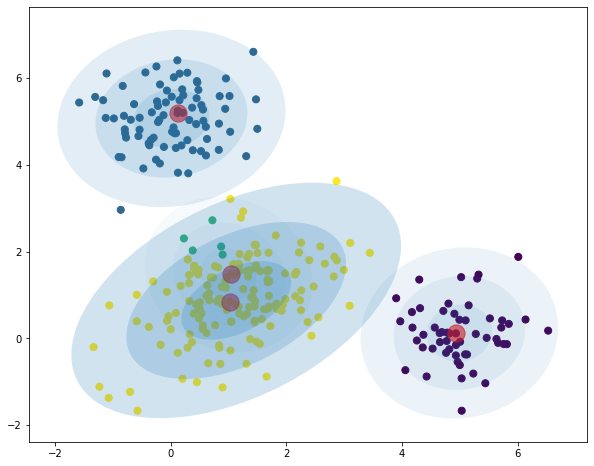

In [17]:
plt.figure(figsize = (10,8))
plt.scatter(X[:, 0], X[:, 1],c=predicted_values ,s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='Red', s=300, alpha=0.6);

w_factor = 0.2 / model.weights.max()
for pos, covar, w in zip(model.means, model.covs, model.weights):
    draw_ellipse(pos, covar, alpha=w * w_factor)


In [18]:
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components = 4, covariance_type = 'full', 
                      max_iter = 600, random_state = 3)

gmm.fit(X)

print('converged or not: ', gmm.converged_)



converged or not:  True


Validation wrt GMM library

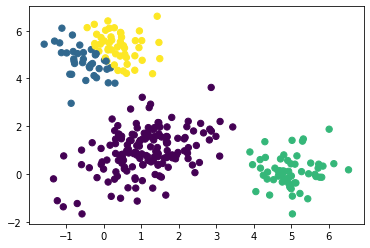

In [19]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(Data)
labels = model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

# Image Segmentation

Image segmentation is the process of partitioning an image into multiple segments. Image segmentation is typically used to locate objects and boundaries in images.

There are many other applications where Image segmentation is transforming industries:

* Traffic Control Systems
* Self Driving Cars
* Locating objects in satellite images


### Image Segmentation using GMM

In [20]:
#Image Segmentation using inbuilt GMM

import numpy as np
import matplotlib.pyplot as plt

In [21]:
from PIL import Image  # To use this PILLOW package, pip install Pillow==2.2.2

(307, 512, 3)


array([[[129, 108,  91],
        [129, 108,  91],
        [130, 109,  92],
        ...,
        [114, 105,  72],
        [114, 105,  74],
        [114, 105,  74]],

       [[129, 108,  91],
        [129, 108,  91],
        [130, 109,  92],
        ...,
        [114, 105,  74],
        [114, 105,  74],
        [113, 104,  73]],

       [[128, 107,  90],
        [128, 107,  90],
        [129, 108,  91],
        ...,
        [113, 104,  73],
        [113, 104,  73],
        [113, 104,  73]],

       ...,

       [[ 86,  67,  60],
        [ 86,  67,  61],
        [ 83,  64,  60],
        ...,
        [ 77,  61,  62],
        [ 90,  72,  72],
        [ 95,  75,  74]],

       [[ 84,  65,  58],
        [ 85,  66,  60],
        [ 82,  63,  59],
        ...,
        [ 93,  75,  75],
        [105,  85,  84],
        [106,  87,  83]],

       [[ 82,  63,  56],
        [ 83,  64,  58],
        [ 81,  62,  58],
        ...,
        [109,  89,  88],
        [115,  94,  91],
        [108,  87,  82]]

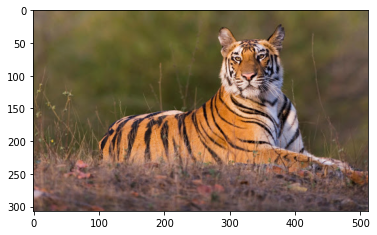

In [34]:
img = np.array(Image.open('tiger.jpg'));
print(img.shape)
plt.imshow(img)
img

In [23]:
img_reshapedto2D=img.reshape((-1,3));
print('Shape of resized Image: ',img_reshapedto2D.shape)
print(img_reshapedto2D)

Shape of resized Image:  (157184, 3)
[[129 108  91]
 [129 108  91]
 [130 109  92]
 ...
 [109  89  88]
 [115  94  91]
 [108  87  82]]


In [24]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(img_reshapedto2D)

In [25]:
segmentation = model.predict(img_reshapedto2D)

(307, 512)


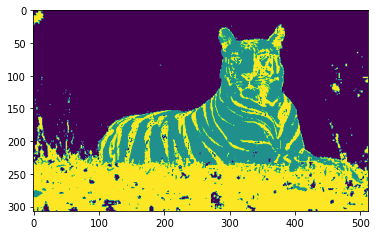

In [26]:
final_segmented_image = segmentation.reshape(img.shape[0],img.shape[1]);
print(final_segmented_image.shape)
plt.imshow(final_segmented_image)

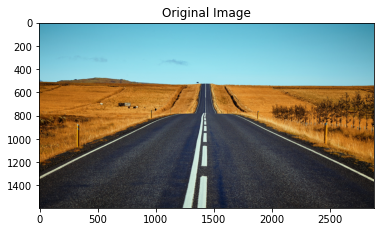

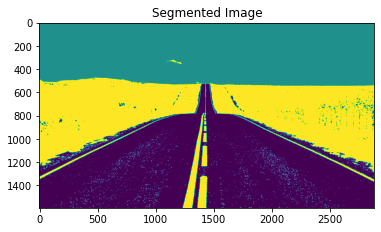

In [27]:
img = np.array(Image.open('road.jpg'))
plt.imshow(img)
plt.title('Original Image')
plt.show()
img_reshapedto2D=img.reshape((-1,3));
model = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(img_reshapedto2D)
segmentation = model.predict(img_reshapedto2D)
final_segmented_image = segmentation.reshape(img.shape[0],img.shape[1]);
plt.imshow(final_segmented_image)
plt.title('Segmented Image')
plt.show()

Text(0.5, 1.0, 'Histogram')

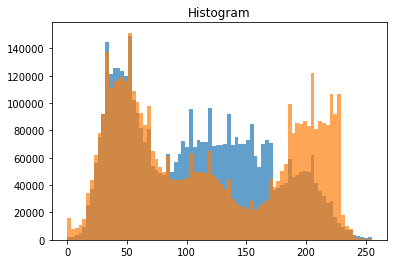

In [28]:
def plot_hist(data):
    for x in data:
        plt.hist(x, bins = 80, alpha = 0.7)

plot_hist([img_reshapedto2D[:, 0], img_reshapedto2D[:, 1]])
plt.title("Histogram")

### Image Segmentation using Kmeans

In [29]:
from sklearn.cluster import KMeans
import numpy as np

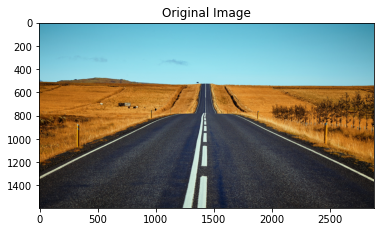

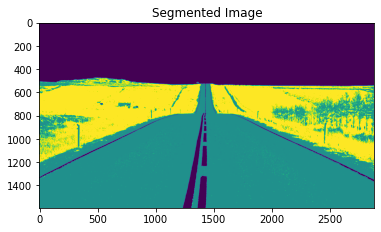

In [30]:
img = np.array(Image.open('road.jpg'))
plt.imshow(img)
plt.title('Original Image')
plt.show()
img_reshapedto2D=img.reshape((-1,3));
model = KMeans(n_clusters=3, random_state=0).fit(img_reshapedto2D)
segmentation = model.predict(img_reshapedto2D)
final_segmented_image = segmentation.reshape(img.shape[0],img.shape[1]);
plt.imshow(final_segmented_image)
plt.title('Segmented Image')
plt.show()

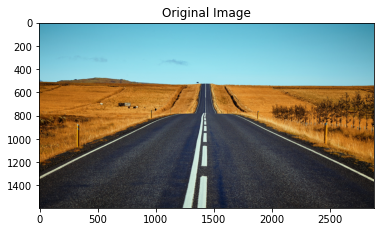

In [31]:
img = np.array(Image.open('road.jpg'))
plt.imshow(img)
plt.title('Original Image')
plt.show()
img_reshapedto2D=img.reshape((-1,3));

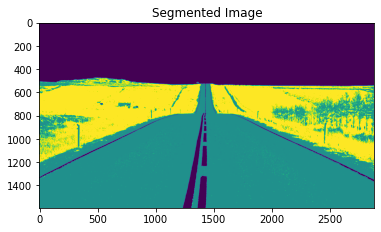

In [32]:
model = KMeans(n_clusters=3, random_state=0).fit(img_reshapedto2D)
segmentation = model.predict(img_reshapedto2D)
final_segmented_image = segmentation.reshape(img.shape[0],img.shape[1]);
plt.imshow(final_segmented_image)
plt.title('Segmented Image')
plt.show()

In [33]:
Kmeans(img_reshapedto2D,4, InitialCents)

TypeError: Kmeans() takes 2 positional arguments but 3 were given

In [ ]:
img_reshapedto2D.mean(0).shape898o

In [ ]:
model = mixture.GaussianMixture(n_components=3, covariance_type='full').fit(img_reshapedto2D)
segmentation = model.predict(img_reshapedto2D)